In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

c:\Users\Kevin Nathanael\anaconda3\envs\torch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load the dataset
df = pd.read_csv(r"C:\Users\Kevin Nathanael\Music\DDI Prediction\data\drug_interactions.csv")
df

,drug_id,drug_name,interacting_drug_id,interacting_drug_name,description
0,DB00001,Lepirudin,DB06605,Apixaban,Apixaban may increase the anticoagulant activi...
1,DB00001,Lepirudin,DB06695,Dabigatran etexilate,Dabigatran etexilate may increase the anticoag...
2,DB00001,Lepirudin,DB01254,Dasatinib,The risk or severity of bleeding and hemorrhag...
3,DB00001,Lepirudin,DB01609,Deferasirox,The risk or severity of gastrointestinal bleed...
4,DB00001,Lepirudin,DB01586,Ursodeoxycholic acid,The risk or severity of bleeding and bruising ...
...,...,...,...,...,...
2855843,DB19413,Influenza A Virus A/Thailand/8/2022 IVR-237 (H...,DB13509,Aloxiprin,The risk or severity of Reye's syndrome can be...
2855844,DB19413,Influenza A Virus A/Thailand/8/2022 IVR-237 (H...,DB13538,Guacetisal,The risk or severity of Reye's syndrome can be...
2855845,DB19413,Influenza A Virus A/Thailand/8/2022 IVR-237 (H...,DB13612,Carbaspirin calcium,The risk or severity of Reye's syndrome can be...
2855846,DB19413,Influenza A Virus A/Thailand/8/2022 IVR-237 (H...,DB14006,Choline salicylate,The risk or severity of Reye's syndrome can be...


In [3]:
# Empty graph
G1 = nx.DiGraph()
G1 = nx.from_pandas_edgelist(df, source="drug_id", target="interacting_drug_id", edge_attr="description")

In [4]:
G1.nodes()

NodeView(('DB00001', 'DB06605', 'DB06695', 'DB01254', 'DB01609', 'DB01586', 'DB02123', 'DB02659', 'DB02691', 'DB03619', 'DB04348', 'DB05990', 'DB06777', 'DB08833', 'DB08834', 'DB08857', 'DB11622', 'DB11789', 'DB09075', 'DB09053', 'DB08935', 'DB06228', 'DB06206', 'DB09070', 'DB00932', 'DB00013', 'DB00163', 'DB09030', 'DB01381', 'DB01181', 'DB00468', 'DB00908', 'DB00675', 'DB00539', 'DB00806', 'DB00686', 'DB00583', 'DB00255', 'DB00269', 'DB00286', 'DB01357', 'DB04574', 'DB04575', 'DB07931', 'DB09317', 'DB09318', 'DB09369', 'DB09381', 'DB11478', 'DB11674', 'DB13143', 'DB13386', 'DB13418', 'DB13952', 'DB13953', 'DB13954', 'DB13956', 'DB15334', 'DB15335', 'DB04573', 'DB09211', 'DB00159', 'DB00244', 'DB00328', 'DB00461', 'DB00465', 'DB00469', 'DB00482', 'DB00500', 'DB00533', 'DB00554', 'DB00573', 'DB00580', 'DB00586', 'DB00605', 'DB00712', 'DB00749', 'DB00784', 'DB00788', 'DB00795', 'DB00812', 'DB00814', 'DB00821', 'DB00861', 'DB00936', 'DB00939', 'DB00991', 'DB01009', 'DB01014', 'DB01250', 

In [5]:
# Set up the layout
pos = nx.spring_layout(G1)

In [6]:
weights = list(nx.get_edge_attributes(G1, "description").values())
weights

['Apixaban may increase the anticoagulant activities of Lepirudin.',
 'Dabigatran etexilate may increase the anticoagulant activities of Lepirudin.',
 'The risk or severity of bleeding and hemorrhage can be increased when Dasatinib is combined with Lepirudin.',
 'The risk or severity of gastrointestinal bleeding can be increased when Lepirudin is combined with Deferasirox.',
 'The risk or severity of bleeding and bruising can be increased when Lepirudin is combined with Ursodeoxycholic acid.',
 'The risk or severity of bleeding and bruising can be increased when Lepirudin is combined with Glycochenodeoxycholic Acid.',
 'The risk or severity of bleeding and bruising can be increased when Lepirudin is combined with Cholic Acid.',
 'The risk or severity of bleeding and bruising can be increased when Lepirudin is combined with Glycocholic acid.',
 'The risk or severity of bleeding and bruising can be increased when Lepirudin is combined with Deoxycholic acid.',
 'The risk or severity of bl

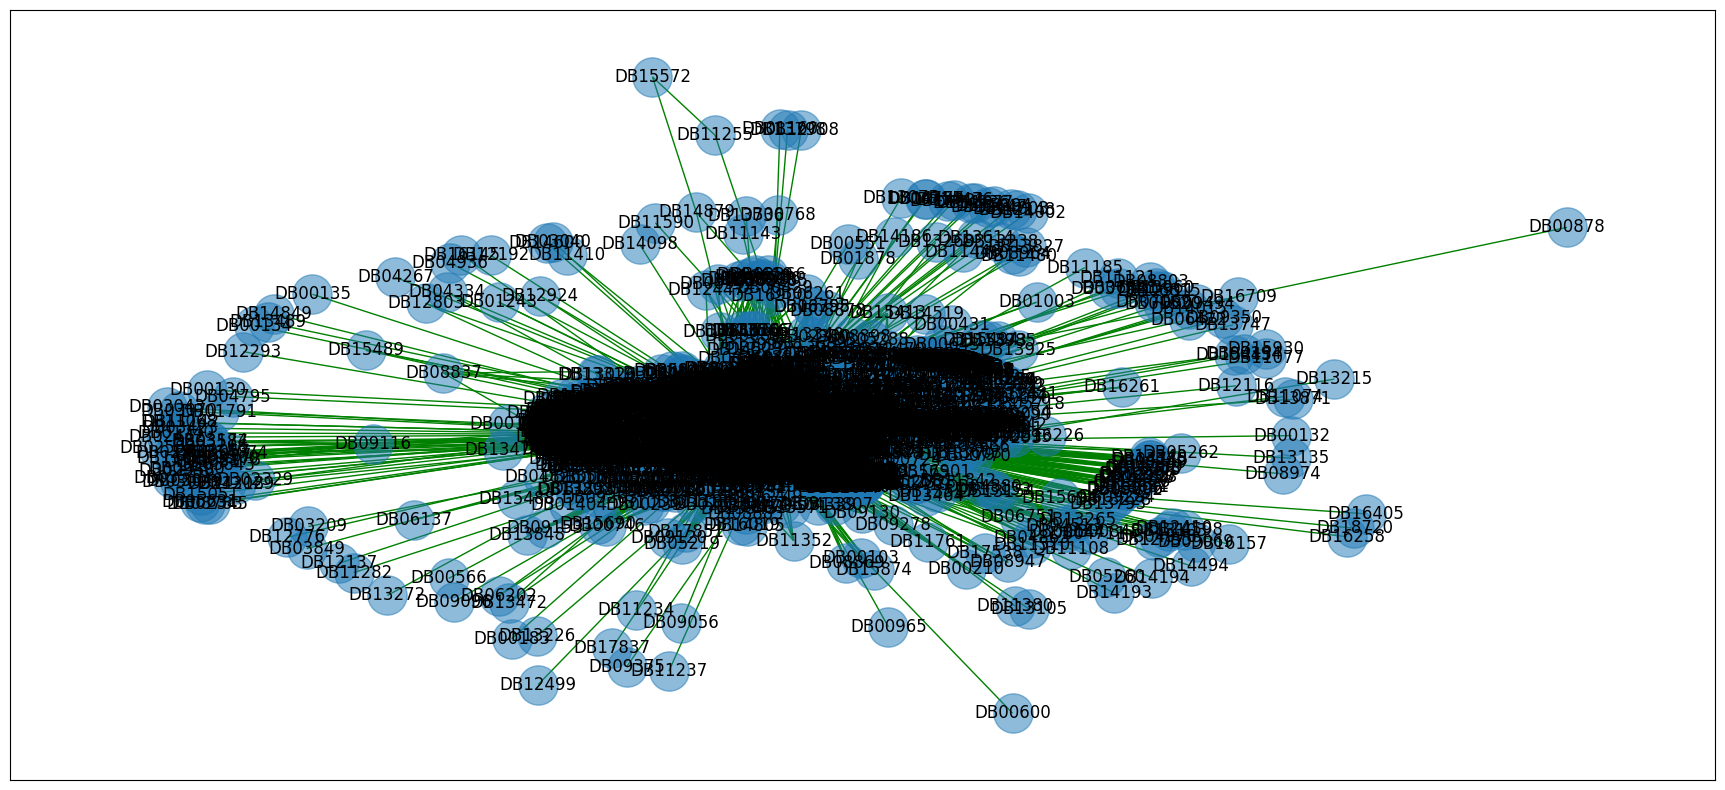

In [8]:
plt.figure(figsize=(22,10))
nx.draw_networkx_nodes(G1, pos, node_size=800, alpha=0.5)
nx.draw_networkx_edges(G1, pos, edge_color="green")
nx.draw_networkx_labels(G1, pos)
plt.show()